In [2]:
if (!require(survRM2)) install.packages('survRM2')
library('survRM2') 
if (!require(mvtnorm)) install.packages('mvtnorm')
library('mvtnorm')
if (!require(survival)) install.packages('survival')
library('survival')
if (!require(nph)) install.packages('nph')
library('nph')
if (!require(foreach)) install.packages("foreach")
library('foreach') 
if (!require(doParallel)) install.packages("doParallel")
library('doParallel')
if (!require(ggplot2)) install.packages("ggplot2")
library('ggplot2')
if (!require(cowplot)) install.packages("cowplot")
library('cowplot')
library('simtrial')  # need to be installed from Github

n_cores <- detectCores()
cluster <- makeCluster(14) # How many cores we use
registerDoParallel(cluster)
# multi thread
clusterEvalQ(cluster,
  {
  library("survRM2")
  library("mvtnorm")
  library("survival")
  library("nph")
  library("simtrial")
  library("foreach")
  })

source('/home/r27user6/RMST_Code/Function.R')
clusterExport(cluster, "expo_gen_2stages")


[[1]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[2]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[3]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[4]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[5]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[6]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[7]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[8]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[9]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[10]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[11]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[12]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[13]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[14]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"

# Piecewice exponential distribution 

## 1. Late Difference

### <span style="color:yellow">with a hazard ratio of 1 until 10 months and then a hazard ratio of 0.5 onward.
#### According to Eaton 2020 simulations
https://doi.org/10.1177/1740774520905563

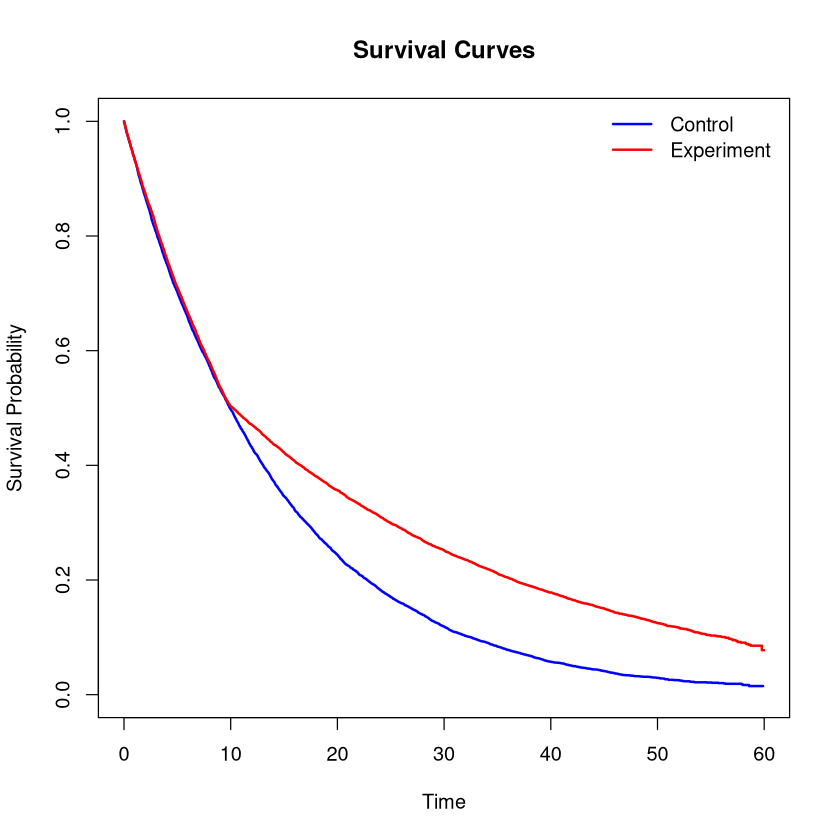

In [4]:
median_con <- 10 # month
lambda_H0 <- log(2)/median_con
HR1 <- 1
HR2 <- 0.5
sim_size <- 10000 
acc_time <- 24
cen_time <- 36
n <- 100  # Fix total sample size
interim <- 0
change_time <- 10
set.seed(2024)

data_C3 <- expo_gen_2stages(N = 10000, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', cen_time = cen_time,
                          arm = 0, interim = interim)
data_E3 <- expo_gen_2stages(N = 10000, acc_time = acc_time, lambda = lambda_H0, dist = 'pcw_exp', cen_time = cen_time,
                          HR1 = HR1, HR2 = HR2, change_time = change_time, arm = 1, interim = interim)
pre_data3 <- rbind(data_C3[ , c(4,5,1)], data_E3[ , c(4,5,1)])

fit <- survfit(Surv(pre_data3[,1], pre_data3[,2]) ~ pre_data3[,3])
plot(fit, col = c("blue", "red"), lwd = 2, xlab = "Time", ylab = "Survival Probability", main = "Survival Curves")
legend("topright", legend = c("Control", "Experiment"), col = c("blue", "red"), lwd = 2, bty = "n")

### Scenario3 one stage log rank test and RMST (interim = 0)
### <span style="color:yellow"> In the paper, P288 table1 logrank power 0.538, RMST power 0.458

In [6]:
data_C3 <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', cen_time = cen_time,
                            arm = 0, interim = 0)[ , c(4,5,1)]

data_E3 <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'pcw_exp', cen_time = cen_time,
                            HR1 = HR1, HR2 = HR2, change_time = change_time, arm = 1, interim = 0)[ , c(4,5,1)]
                          
power_lr <- log_rank_sim(data_C = data_C3, data_E = data_E3, sim_size = sim_size,
                        n = 100, alpha = 0.05, sided = 'two_sided')
cat('The power of two-sided log rank test here is:', power_lr)
RMST_two_sided_test(n = 100, data_E = data_C3, data_C = data_E3, tau = 48, sim_size = sim_size, alpha = 0.05)

The power of two-sided log rank test here is: 0.5347

,Rejection,tau.adjustment
,<dbl>,<dbl>
result.10000,0.4759,0.0119


## 2. Early Difference

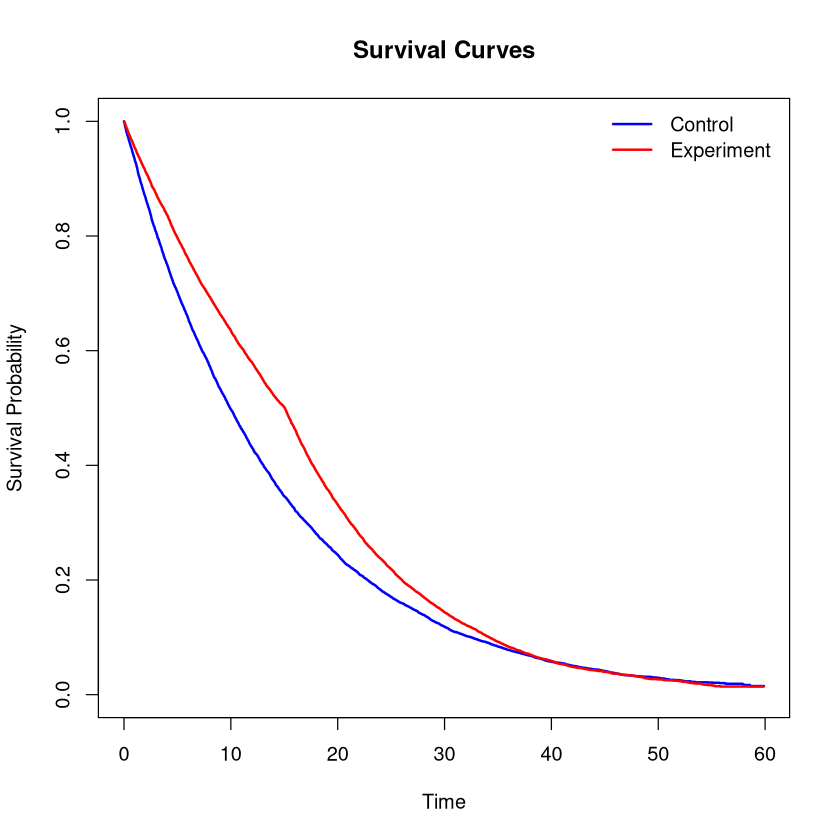

In [7]:
median_con <- 10 #month
lambda_H0 <- log(2)/median_con
HR1 <- 0.67
HR2 <- 1.2
sim_size <- 10000 
acc_time <- 24
cen_time <- 36
n <- 100  # Fix total sample size
interim <- 0
change_time <- 15
set.seed(2024)

data_C <- expo_gen_2stages(N = 10000, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', cen_time = cen_time,
                          arm = 0, interim = interim)
data_E <- expo_gen_2stages(N = 10000, acc_time = acc_time, lambda = lambda_H0, dist = 'pcw_exp', cen_time = cen_time,
                          HR1 = HR1, HR2 = HR2, change_time = change_time, arm = 1, interim = interim)
pre_data <- rbind(data_C[ , c(4,5,1)], data_E[ , c(4,5,1)])

fit <- survfit(Surv(pre_data[,1], pre_data[,2]) ~ pre_data[,3])
plot(fit, col = c("blue", "red"), lwd = 2, xlab = "Time", ylab = "Survival Probability", main = "Survival Curves")
legend("topright", legend = c("Control", "Experiment"), col = c("blue", "red"), lwd = 2, bty = "n")

### Scenario4 one stage log rank test and RMST (interim = 0)
### <span style="color:yellow"> In the paper, P288 table1 logrank power 0.211, RMST power 0.294

In [8]:
data_C4 <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', cen_time = cen_time,
                            arm = 0, interim = 0)[ , c(4,5,1)]

data_E4 <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'pcw_exp', cen_time = cen_time,
                            HR1 = HR1, HR2 = HR2, change_time = change_time, arm = 1, interim = 0)[ , c(4,5,1)]
                          
power_lr <- log_rank_sim(data_C = data_C4, data_E = data_E4, sim_size = sim_size,
                        n = 100, alpha = 0.05, sided = 'two_sided')
cat('The power of two-sided log rank test here is:', power_lr)
RMST_two_sided_test(n = 100, data_E = data_C4, data_C = data_E4, tau = 48, sim_size = sim_size, alpha = 0.05)

The power of two-sided log rank test here is: 0.2201

,Rejection,tau.adjustment
,<dbl>,<dbl>
result.10000,0.3019,0.0227
